<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>ML & DL</b></center>

<center><b><h1>Lab - 9</b></center>    
<pre>    

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [3]:
df = pd.read_csv("heart.csv")

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

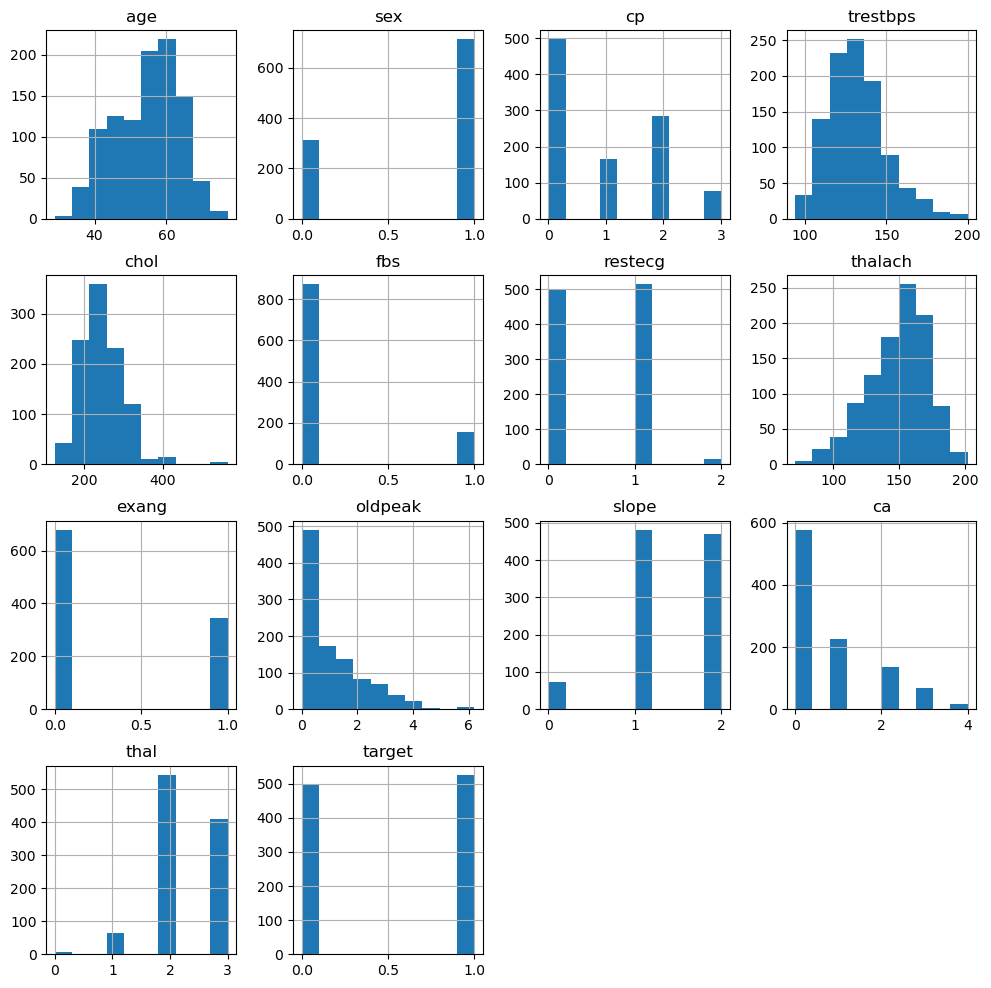

In [6]:
df.hist(figsize=(12,12))

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

In [7]:
import seaborn as sns

In [8]:
%matplotlib qt

In [9]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

In [10]:
df.boxplot()

<Axes: >

# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [11]:
x = df.iloc[::,:-1:]

In [12]:
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=80)

# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_predict = model.predict(x_test)

In [20]:
accuracy_score(y_test,y_predict)

0.9707792207792207

In [21]:
model.score(x_test,y_test)

0.9707792207792207

# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
bagging_cls = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100
)

In [24]:
bagging_cls.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=3)
,n_estimators,100
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [25]:
from sklearn.metrics import accuracy_score
# Tranining accuracy
y_train_pred = bagging_cls.predict(x_train)
print(accuracy_score(y_train, y_train_pred))

0.8605299860529986


In [26]:
# Test accuracy
y_pred = bagging_cls.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8636363636363636


In [27]:
# bagging_cls.score(x_train,y_train)

0.8605299860529986

In [28]:
# bagging_cls.score(x_test, y_test)

0.8636363636363636

# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    max_samples=10,
    max_leaf_nodes=2,
    n_jobs=-1
)

In [34]:
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,2
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
rf_model.score(x_train, y_train)

0.8047419804741981

In [38]:
rf_model.score(x_test, y_test)

0.7954545454545454

# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

In [35]:
rf_model.feature_importances_

array([0.15151515, 0.05050505, 0.04040404, 0.07070707, 0.06060606,
       0.01010101, 0.06060606, 0.11111111, 0.04040404, 0.14141414,
       0.06060606, 0.1010101 , 0.1010101 ])

In [36]:
rf_model.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=1000,
    learning_rate=0.01,
    random_state=42
)

In [53]:
ada_model.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,1000
,learning_rate,0.01
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.

In [54]:
ada_model.score(x_train, y_train)

0.8423988842398884

In [55]:
ada_model.score(x_test, y_test)

0.8506493506493507

# <---- B ---->

## Cost Complexity Pruning for Decision Tree

In [67]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("--------------------------------------------------------------\n", ccp_alphas)
print("--------------------------------------------------------------\n", impurities)

--------------------------------------------------------------
 [0.         0.00092402 0.00129508 0.00138508 0.00209205 0.00254684
 0.00360577 0.0037192  0.00391703 0.00472052 0.00485896 0.00524261
 0.00531059 0.00587106 0.00594213 0.0061277  0.00656329 0.0076677
 0.00792351 0.00831009 0.00831886 0.00924661 0.01033719 0.0105629
 0.01238959 0.01389575 0.01769765 0.02727288 0.03033025 0.04614615
 0.13514762]
--------------------------------------------------------------
 [0.         0.00277207 0.00536223 0.0081324  0.01022445 0.01531813
 0.02613544 0.02985464 0.0376887  0.04240923 0.05212714 0.05736974
 0.06268033 0.06855139 0.07449352 0.09287663 0.09943993 0.10710762
 0.11503113 0.13165131 0.15660788 0.17510109 0.19577547 0.21690127
 0.22929086 0.24318661 0.26088426 0.28815714 0.31848739 0.36463354
 0.49978117]


In [68]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    print(clf.score(x_test, y_test))
    clfs.append(clf)

0.9707792207792207
0.961038961038961
0.9545454545454546
0.948051948051948
0.9415584415584416
0.9285714285714286
0.9188311688311688
0.9155844155844156
0.9155844155844156
0.9123376623376623
0.9058441558441559
0.9025974025974026
0.9058441558441559
0.9058441558441559
0.9025974025974026
0.8961038961038961
0.8993506493506493
0.8928571428571429
0.8928571428571429
0.8766233766233766
0.8701298701298701
0.8636363636363636
0.8668831168831169
0.8311688311688312
0.8409090909090909
0.8376623376623377
0.8311688311688312
0.7597402597402597
0.7597402597402597
0.7597402597402597
0.5194805194805194


In [72]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [80]:
train_acc = []
test_acc = []

for clf in clfs:
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

In [81]:
plt.figure()
plt.plot(ccp_alphas, train_acc, marker='o', label='Training Accuracy')
plt.plot(ccp_alphas, test_acc, marker='o', label='Testing Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha (Cost Complexity Pruning)")
plt.legend()
plt.show()

## Random Forest with Iterative Training (OOB Error)

In [82]:
rf = RandomForestClassifier(oob_score=True, warm_start=True, random_state=42)

oob_error_rates = []
n_estimators_list = list(range(10, 201, 10))

for n in n_estimators_list:
    rf.set_params(n_estimators=n)
    rf.fit(x_train, y_train)
    
    # OOB Error = 1 - OOB Score
    oob_error = 1 - rf.oob_score_
    oob_error_rates.append(oob_error)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [83]:
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, oob_error_rates, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("OOB Error Rate")
plt.title("OOB Error Rate vs Number of Trees (Random Forest)")
plt.grid(True)
plt.show()

## Receiver Operating Characteristic (ROC) Analysis

In [84]:
from sklearn.metrics import roc_curve, auc


y_prob = rf.predict_proba(x_test)[:, 1]

# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve


In [85]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.show()